In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Step 1 : Download the dataset - Downloaded.

# Step 2 : Load the dataset into the tool.

In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.rename(columns={"Sex":"sex", "Length":"length", "Diameter":"diameter",
                   "Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight", "Rings":"rings"}, inplace = True)

In [10]:
df['age'] = df['rings']+1.5

In [12]:
df.drop('rings', axis = 1, inplace = True)

# Step 3 : Perform Below Visualizations.

## 3.1 Univariate Analysis 

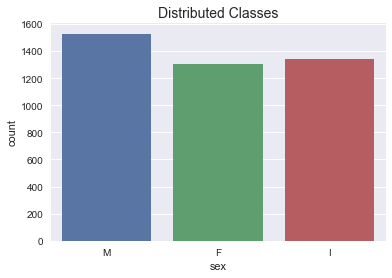

In [13]:
sns.countplot('sex', data=df)
plt.title('Distributed Classes', fontsize=14)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016600058A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001667FC58CF8>]], dtype=object)

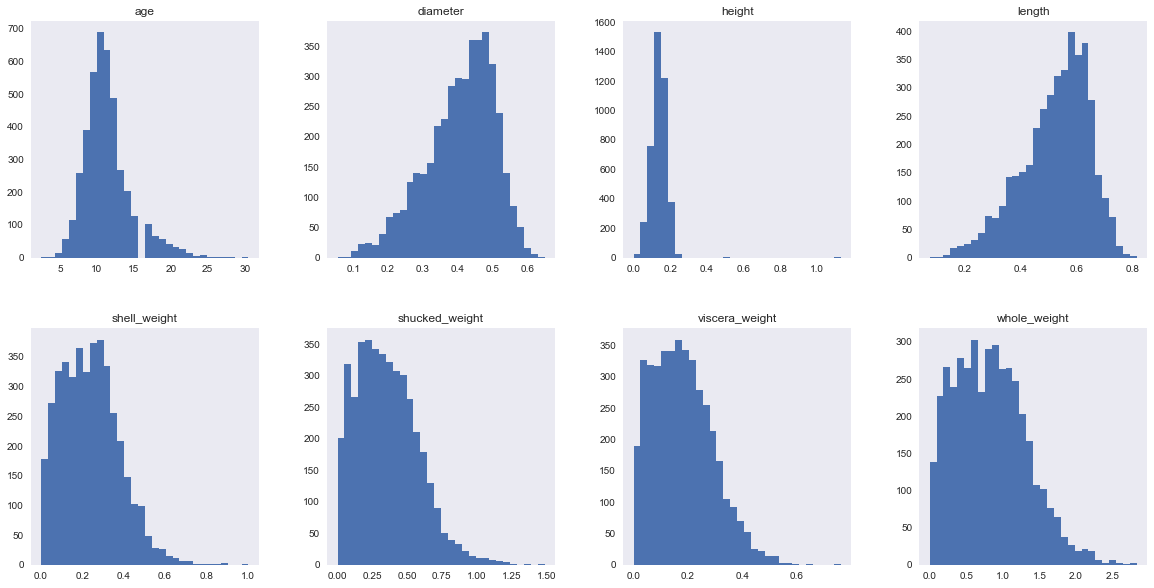

In [15]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

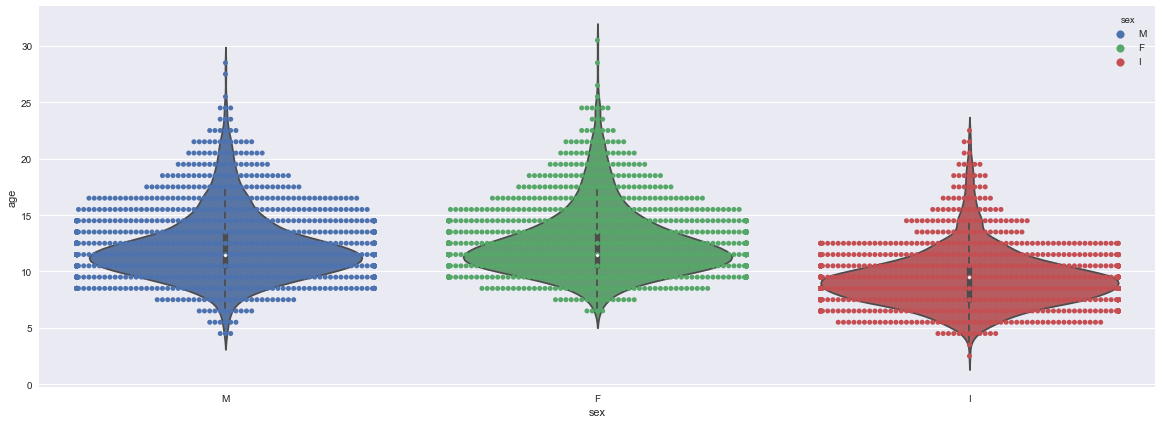

In [14]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'sex', y = 'age', data = df, hue = 'sex')
sns.violinplot(x = 'sex', y = 'age', data = df)

In [17]:
df.groupby('sex')[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'age']].mean().sort_values('age')

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


([<matplotlib.patches.Wedge at 0x16600f39470>,
  <matplotlib.text.Text at 0x1660031b748>])

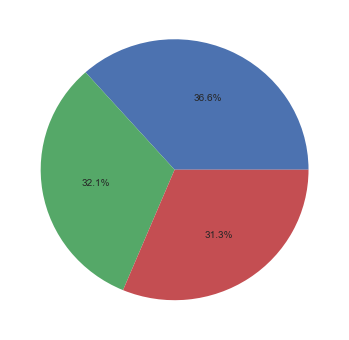

In [19]:
plt.subplots(figsize=(6,6))
plt.pie(df['sex'].value_counts(),autopct="%1.1f%%")

## 3.2 Bi-Variate Analysis

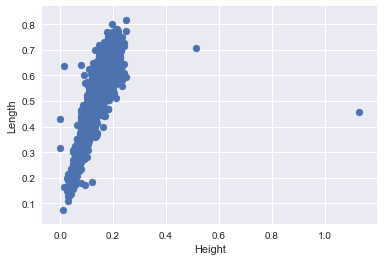

In [20]:
plt.scatter(df.height,df.length)
plt.xlabel('Height')
plt.ylabel('Length')

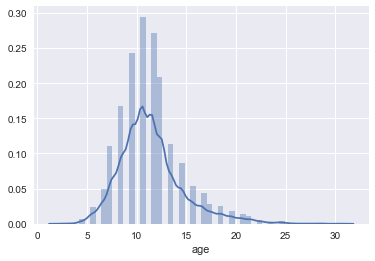

In [21]:
sns.distplot(df["age"])

## 3.3 Multi-Variate Analysis

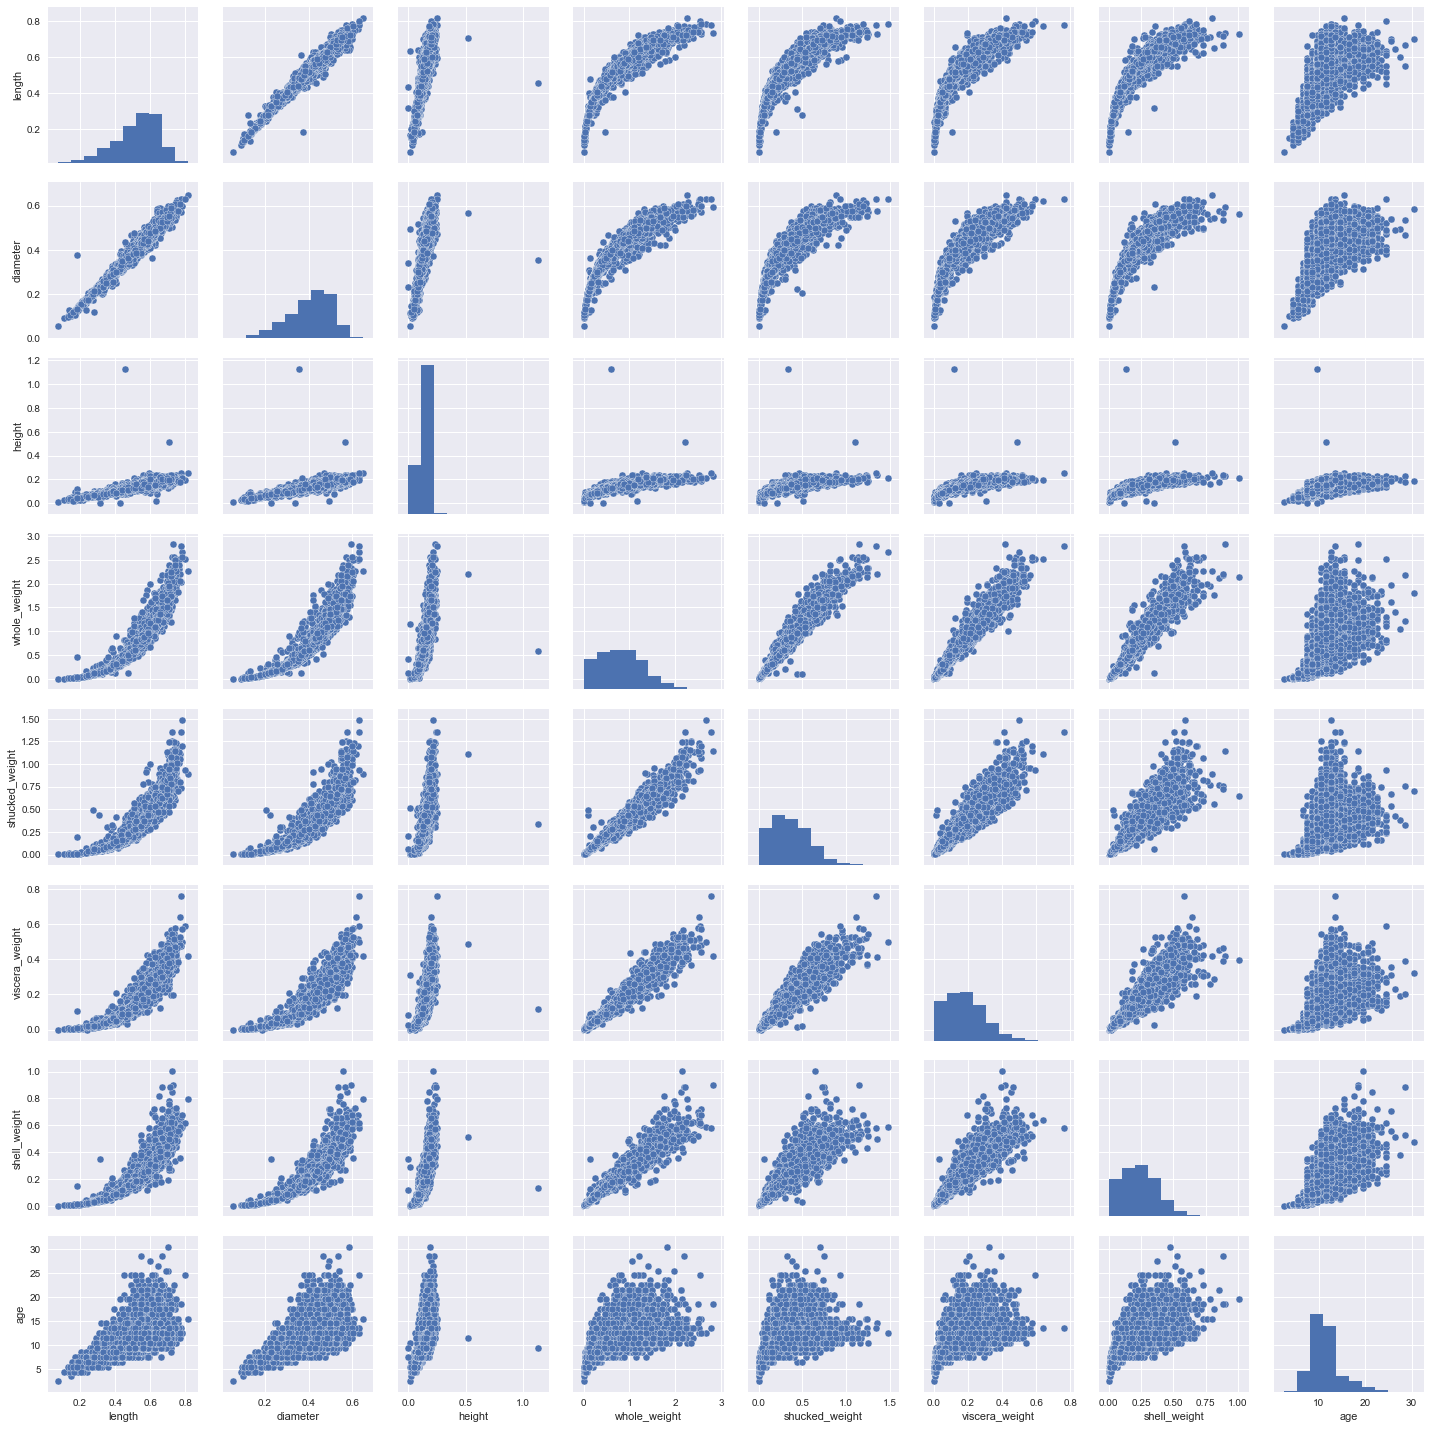

In [23]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

sns.pairplot(df[numerical_features])

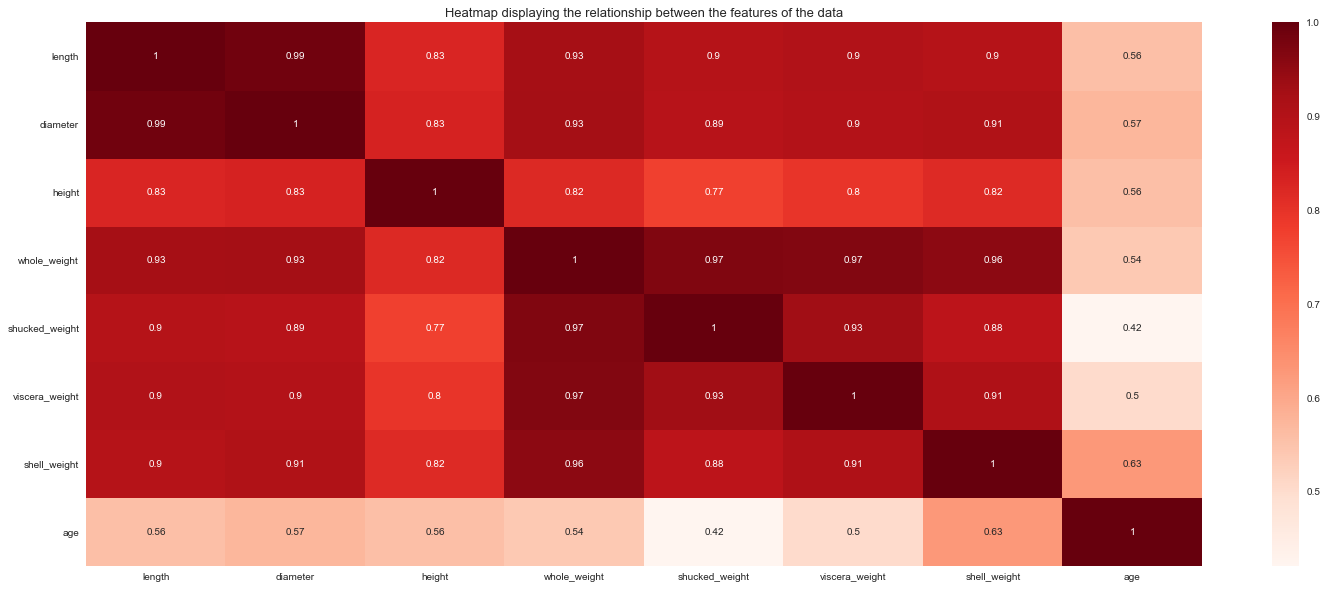

In [24]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

# Step 4 : Perform descriptive statistics on the dataset.

In [25]:
df.mean()

length             0.523992
diameter           0.407881
height             0.139516
whole_weight       0.828742
shucked_weight     0.359367
viscera_weight     0.180594
shell_weight       0.238831
age               11.433684
dtype: float64

In [27]:
df.std()

length            0.120093
diameter          0.099240
height            0.041827
whole_weight      0.490389
shucked_weight    0.221963
viscera_weight    0.109614
shell_weight      0.139203
age               3.224169
dtype: float64

In [28]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# Step 5 : Check for Missing values and deal with them. 

In [29]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64

# Step 6 : Find the outliers and replace them outliers

In [30]:
data = pd.get_dummies(df)
dummy_data = data.copy()

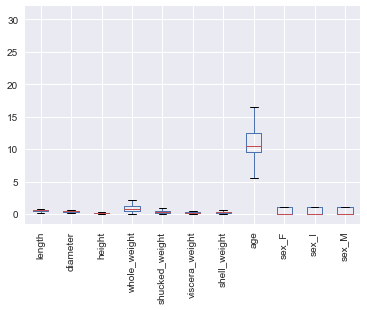

In [32]:
data.boxplot( rot = 90, figsize=(20,5))

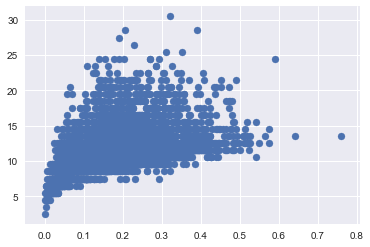

In [33]:
var = 'viscera_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [35]:
data.drop(data[(data['viscera_weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['viscera_weight']<0.5) & (data['age'] > 25)].index, inplace=True)

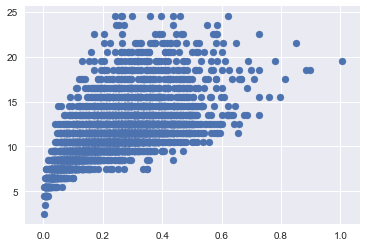

In [36]:
var = 'shell_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [37]:
data.drop(data[(data['shell_weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['shell_weight']<0.8) & (data['age'] > 25)].index, inplace=True)

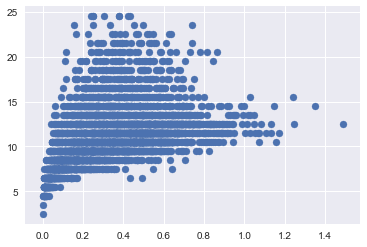

In [38]:
var = 'shucked_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [40]:
data.drop(data[(data['shucked_weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['shucked_weight']<1) & (data['age'] > 20)].index, inplace=True)

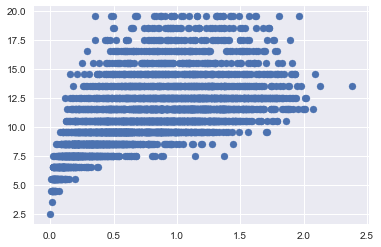

In [41]:
var = 'whole_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [42]:
data.drop(data[(data['whole_weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['whole_weight']<2.5) & (data['age'] > 25)].index, inplace=True)

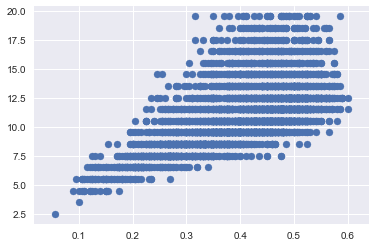

In [43]:
var = 'diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [45]:
data.drop(data[(data['diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

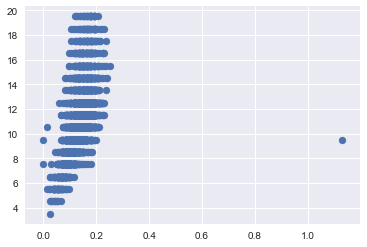

In [46]:
var = 'height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [47]:
data.drop(data[(data['height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['height']<0.4) & (data['age'] > 25)].index, inplace=True)

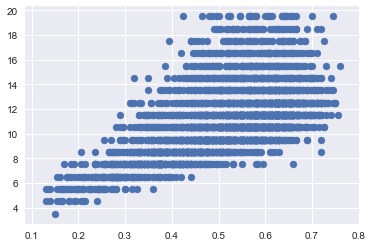

In [48]:
var = 'length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [49]:
data.drop(data[(data['length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['length']>=0.8) & (data['age']< 25)].index, inplace=True)

# Step 7 : Check for Categorical columns and perform encoding.

In [50]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
age               float64
dtype: object

In [52]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex']) 
df['sex'].unique()

array([2, 0, 1], dtype=int64)

In [53]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Step 8 : Split the data into dependent and independent variables.

In [56]:
X= df.drop(['age'], axis = 1) 
y = df['age']

# Step 9 : Scale the independent variables

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standardScale = StandardScaler()
X=standardScale.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Step 10 : Build the Model

In [58]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [59]:
regressor.fit(X_train, y_train)

regressor.score(X_train,y_train)*100

93.882251546622925